In [20]:
#Import all important libary for this analysis
#This file contains only the best methods tested in preprocessing analysis
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#Used for regex pattern which is called in the labmba expression to extract lsoa name into a new column
import re

In [21]:
#The data set here contains outlier free , normalized columns and cleaned rows 
df_Original = pd.read_csv("Dataset/MergedMedianHousePrice_Deprivation_Compact1_NonMissing.csv",header=0,delimiter=',')
#Rename columns
df_Original.rename(columns={'LSOAcode2011': 'LSOACode'}, inplace=True)
#This would essentianly enable us group by LSOA i.e to find the Median value of any feature of Lsoa name = 'City of London'
df_Original['LSOAname_'] = df_Original['LSOAname'].apply(lambda x: re.split(r'\d', x)[0].strip())
# stores unique lsoa name into an array
lsoa_names = df_Original['LSOAname_'].unique()

columns_to_keep = ['LSOACode', 'LSOAname','LSOAname_','YearendingDec2021', 'YearendingDec2020', 'YearendingDec2019',
                   'YearendingDec2018', 'YearendingDec2017', 'YearendingDec2016', 'YearendingDec2015',
                   'YearendingDec2014', 'YearendingDec2013', 'YearendingDec2012', 'YearendingDec2011',
                   'YearendingDec2010']
df_Original = df_Original[columns_to_keep]
df_Original.head()


,LSOACode,LSOAname,LSOAname_,YearendingDec2021,YearendingDec2020,YearendingDec2019,YearendingDec2018,YearendingDec2017,YearendingDec2016,YearendingDec2015,YearendingDec2014,YearendingDec2013,YearendingDec2012,YearendingDec2011,YearendingDec2010
0,E01000001,City of London 001A,City of London,840000.0,820000.0,865000.0,834750.0,935000.0,985000.0,872500.0,790000.0,690000.0,545000.0,504999.5,499475.0
1,E01000002,City of London 001B,City of London,817500.0,817000.0,862500.0,830000.0,842475.0,845000.0,844525.0,759387.5,630000.0,595000.0,527500.0,525000.0
2,E01000003,City of London 001C,City of London,540000.0,540000.0,515000.0,651000.0,760000.0,717500.0,525000.0,510000.0,390000.0,367000.0,425150.0,325000.0
3,E01000006,Barking and Dagenham 016A,Barking and Dagenham,410000.0,415000.0,210000.0,365000.0,411000.0,403000.0,256500.0,267500.0,250000.0,235050.0,240500.0,241500.0
4,E01000010,Barking and Dagenham 015C,Barking and Dagenham,200000.0,255000.0,225000.0,230000.0,228558.5,220000.0,194500.0,169995.0,141000.0,121750.0,151475.0,137750.0


In [22]:
# Read the Kmean clustering output generated, which is available on my drive
#This data already contains the LSOAcode against the respective clusters
df_Kmeans = pd.read_csv("Dataset/KMeans_Output.csv",header=0,delimiter=',')
df_Kmeans.head()

,LSOACode,Cluster
0,E01000001,0
1,E01000002,0
2,E01000003,3
3,E01000006,3
4,E01000010,3


In [23]:
import pandas as pd

# Joining the two DataFrames based on the 'LSOACode' column
df = pd.merge(df_Original,df_Kmeans, on='LSOACode')

# Display the merged DataFrame
df.head()

,LSOACode,LSOAname,LSOAname_,YearendingDec2021,YearendingDec2020,YearendingDec2019,YearendingDec2018,YearendingDec2017,YearendingDec2016,YearendingDec2015,YearendingDec2014,YearendingDec2013,YearendingDec2012,YearendingDec2011,YearendingDec2010,Cluster
0,E01000001,City of London 001A,City of London,840000.0,820000.0,865000.0,834750.0,935000.0,985000.0,872500.0,790000.0,690000.0,545000.0,504999.5,499475.0,0
1,E01000002,City of London 001B,City of London,817500.0,817000.0,862500.0,830000.0,842475.0,845000.0,844525.0,759387.5,630000.0,595000.0,527500.0,525000.0,0
2,E01000003,City of London 001C,City of London,540000.0,540000.0,515000.0,651000.0,760000.0,717500.0,525000.0,510000.0,390000.0,367000.0,425150.0,325000.0,3
3,E01000006,Barking and Dagenham 016A,Barking and Dagenham,410000.0,415000.0,210000.0,365000.0,411000.0,403000.0,256500.0,267500.0,250000.0,235050.0,240500.0,241500.0,3
4,E01000010,Barking and Dagenham 015C,Barking and Dagenham,200000.0,255000.0,225000.0,230000.0,228558.5,220000.0,194500.0,169995.0,141000.0,121750.0,151475.0,137750.0,3


In [26]:
# List of features
features_to_process = ['YearendingDec2021', 'YearendingDec2020', 'YearendingDec2019',
                   'YearendingDec2018', 'YearendingDec2017', 'YearendingDec2016', 'YearendingDec2015',
                   'YearendingDec2014', 'YearendingDec2013', 'YearendingDec2012', 'YearendingDec2011',
                   'YearendingDec2010']

def mark_outliers(dfc, ft, scale):
    Q1 = dfc[ft].quantile(0.25)
    Q3 = dfc[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - scale * IQR
    upper_bound = Q3 + scale * IQR
    
    outlier_indices = dfc.index[(dfc[ft] < lower_bound) | (dfc[ft] > upper_bound)]
    return outlier_indices

def replace_outliers_with_city_mean(dfc, ft, outlier_indices):
    for index in outlier_indices:
        # Get the LSOA name of the outlier
        lsoa_name = dfc.loc[index, 'LSOAname_']
        # compute mean value of the given feature for the lsoa name (excluding the outlier rows when computing mean)
        lsoa_mean = dfc[(dfc['LSOAname_'] == lsoa_name) & (~dfc.index.isin(outlier_indices))][ft].median()
        #set the outlier value to the new trimmed mean
        dfc.loc[index, ft] = lsoa_mean
    return dfc

# Iterate through each feature and perform outlier identification and replacement with city mean
for feature in features_to_process:
    outlier_indices = mark_outliers(df, feature, 1.5)
    df = replace_outliers_with_city_mean(df, feature, outlier_indices)

# Now df_no_outliers contains the DataFrame with outliers replaced by the city mean


In [28]:
#instances where there weher no rows that fulling the condition missing values could have formed
df = df.dropna()
df.shape

(27916, 16)

In [29]:
dtTemp = df[df["Cluster"] == 1].copy()  # Create a copy to avoid chained assignment
dtTemp['HousePriceIncrease'] = dtTemp['YearendingDec2021'] - dtTemp['YearendingDec2010']
dtTemp = dtTemp.reset_index(drop=True)  # Use drop=True to remove the old index column
dtTemp.head()



# Find the row index with the highest difference
row_index_max_diff = dtTemp['HousePriceIncrease'].idxmax()
print(row_index_max_diff)
highest_diff_row = dtTemp.iloc[row_index_max_diff]
print(highest_diff_row)

644
LSOACode                        E01004420
LSOAname              Waltham Forest 020C
LSOAname_                  Waltham Forest
YearendingDec2021                630000.0
YearendingDec2020                490000.0
YearendingDec2019                477000.0
YearendingDec2018                448000.0
YearendingDec2017                490000.0
YearendingDec2016                399995.0
YearendingDec2015                385500.0
YearendingDec2014                376000.0
YearendingDec2013                245000.0
YearendingDec2012                180000.0
YearendingDec2011                248500.0
YearendingDec2010                187500.0
Cluster                                 1
HousePriceIncrease               442500.0
Name: 644, dtype: object


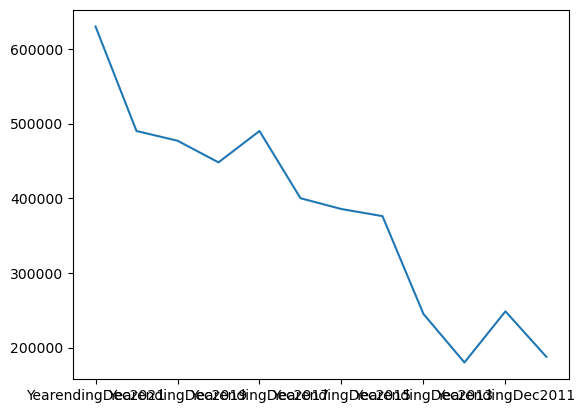

In [30]:
import matplotlib.pyplot as plt
c = ['YearendingDec2021', 'YearendingDec2020', 'YearendingDec2019',
                   'YearendingDec2018', 'YearendingDec2017', 'YearendingDec2016', 'YearendingDec2015',
                   'YearendingDec2014', 'YearendingDec2013', 'YearendingDec2012', 'YearendingDec2011',
                   'YearendingDec2010']
highest_diff_row[c].plot.line()
plt.show()

In [31]:
row_index_max_diff = df['YearendingDec2020'].idxmax()

# Extract values from the row with the highest difference and store in an array
highest_diff_row = df.iloc[row_index_max_diff]
highest_diff_values = highest_diff_row.values

# Print the array with highest difference values
print(highest_diff_values)

['E01000123' 'Barnet 010D' 'Barnet' 518000.0 492500.0 457750.0 475000.0
 460000.0 445000.0 424000.0 370000.0 308500.0 303750.0 280000.0 275000.0 0]
